In [367]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [368]:
df = pd.read_csv('housePrice.csv')
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [369]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']]
cdf['Area'] = cdf['Area'].str.extract(r'(\d+)')
cdf.head(10)


C:\Users\MohamadReza\AppData\Local\Temp\ipykernel_12808\946673369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Area'] = cdf['Area'].str.extract(r'(\d+)')


,Area,Room,Parking,Warehouse,Elevator,Price(USD)
0,63,1,True,True,True,61666.67
1,60,1,True,True,True,61666.67
2,79,2,True,True,True,18333.33
3,95,2,True,True,True,30083.33
4,123,2,True,True,True,233333.33
5,70,2,True,True,False,68333.33
6,87,2,True,True,True,20000.00
7,59,1,True,True,True,71666.67
8,54,2,True,True,False,16433.33
9,71,1,True,True,True,79000.00


In [370]:
# normalize = preprocessing.normalize(cdf, axis=0)
# scaled_df = pd.DataFrame(normalize, columns=['Area', 'Room', 'Parking', 'Warehouse','Elevator',  'Price(USD)'])
# scaled_df.head()

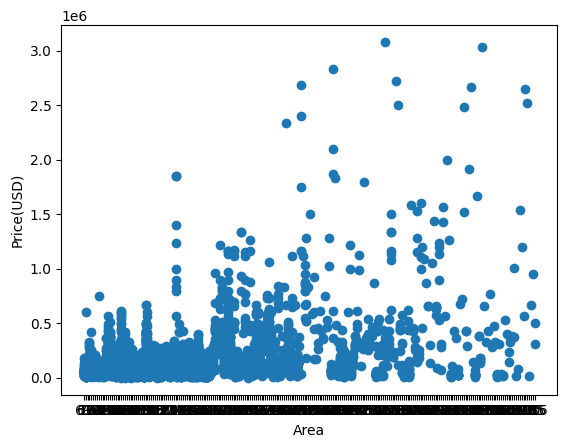

In [371]:
plt.scatter(cdf["Area"] , cdf['Price(USD)'])
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

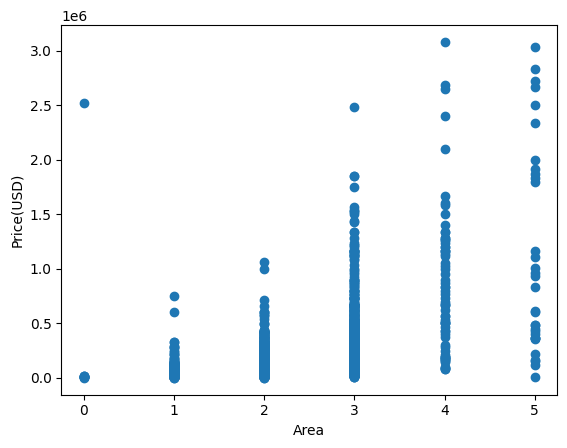

In [372]:
plt.scatter(cdf["Room"] , cdf['Price(USD)'])
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

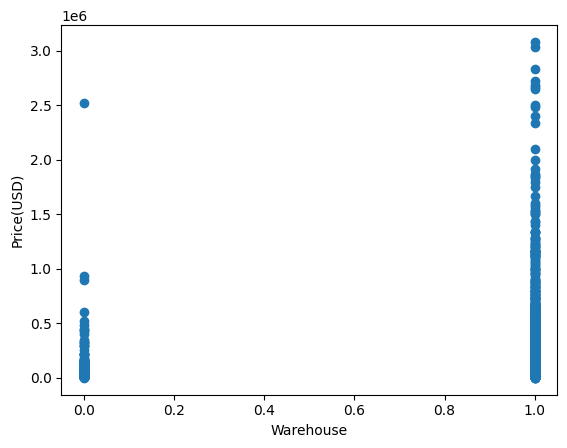

In [373]:
plt.scatter(cdf["Warehouse"] , cdf['Price(USD)'])
plt.xlabel('Warehouse')
plt.ylabel('Price(USD)')
plt.show()

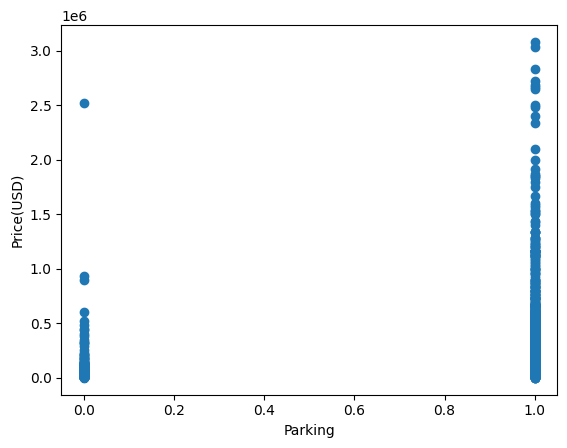

In [374]:
plt.scatter(cdf["Parking"] , cdf['Price(USD)'])
plt.xlabel('Parking')
plt.ylabel('Price(USD)')
plt.show()

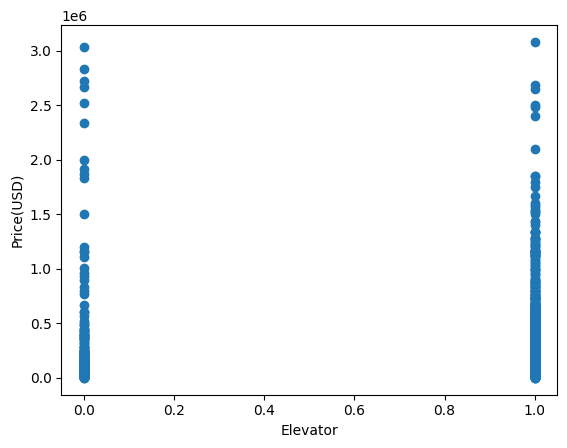

In [375]:
plt.scatter(cdf["Elevator"] , cdf['Price(USD)'])
plt.xlabel('Elevator')
plt.ylabel('Price(USD)')
plt.show()

In [377]:
# remove outlines (cdf , df mordan az scaled_df estefade kon kolan)
# IQR

Q1 = np.percentile(cdf['Area'], 25, interpolation = 'midpoint')
Q3 = np.percentile(cdf['Area'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(cdf['Area'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(cdf['Area'] <= (Q1-1.5*IQR))

#print(f'upper : {upper}')
#print('---------------------------')
#print(f'lower : {lower}')

# Removing the Outliers 

cdf.drop(upper[0], inplace = True)
cdf.drop(lower[0], inplace = True)

C:\Users\MohamadReza\AppData\Local\Temp\ipykernel_12808\480680463.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(cdf['Area'], 25, interpolation = 'midpoint')


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

In [ ]:
# Q1 = np.percentile(scaled_df['Room'], 25, interpolation = 'midpoint')
# Q3 = np.percentile(scaled_df['Room'], 75, interpolation = 'midpoint')
# IQR = Q3 - Q1

# upper = np.where(scaled_df['Room'] >= (Q3+1.5*IQR))
# lower = np.where(scaled_df['Room'] <= (Q1-1.5*IQR))

# scaled_df.drop(upper[0], inplace = True)
# scaled_df.drop(lower[0], inplace = True)

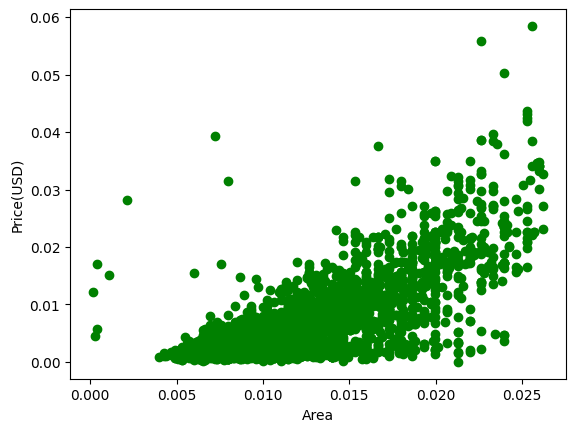

In [ ]:
plt.scatter(cdf["Area"] , cdf['Price(USD)'], color='g')
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

In [ ]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse']])
test_y = np.asanyarray(test[['Price(USD)']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Coefficients:  [[ 0.00000000e+00 -1.21472001e+00  1.28880954e-01  1.47595795e+08
   1.22955400e+08  6.97803518e+01 -1.17394075e+01  2.68413039e+01
   2.24641604e+00  2.20847815e+00 -4.64217144e+00 -3.95158647e-01
  -8.01650361e+09  2.54312223e+00 -6.93581812e+09]]
Intercept:  [0.00614179]
R2-score: 0.56
